### Importação dos dados



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregamento dos dados com coluna de origem
loja1 = pd.read_csv(url1)
loja1["Loja Origem"] = "Loja 1"

loja2 = pd.read_csv(url2)
loja2["Loja Origem"] = "Loja 2"

loja3 = pd.read_csv(url3)
loja3["Loja Origem"] = "Loja 3"

loja4 = pd.read_csv(url4)
loja4["Loja Origem"] = "Loja 4"

# Concatenar todos os dataframes
lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Visualizar as primeiras linhas
lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja Origem
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


In [9]:
# Criar um dicionário para armazenar o faturamento de cada loja por ano
faturamento_por_loja = {}

# Listar todas as lojas únicas
lojas_unicas = lojas["Loja Origem"].unique()

# Calcular o faturamento por ano para cada loja
for loja in lojas_unicas:
    # Filtrar os dados para a loja específica
    dados_loja = lojas[lojas["Loja Origem"] == loja]

    # Calcular o faturamento por ano e arredondar para 2 casas decimais
    faturamento_por_ano = dados_loja.groupby("Ano")["Preço"].sum().round(2).to_dict()

    # Armazenar o faturamento no dicionário
    faturamento_por_loja[loja] = faturamento_por_ano

# Exibir os resultados
for loja, faturamento in faturamento_por_loja.items():
    print(f"Faturamento de {loja}: {faturamento}")

Faturamento de Loja 1: {2020: 491911.51, 2021: 482829.91, 2022: 422086.24, 2023: 137681.46}
Faturamento de Loja 2: {2020: 427288.25, 2021: 468288.89, 2022: 477635.56, 2023: 115246.36}
Faturamento de Loja 3: {2020: 428943.09, 2021: 483938.91, 2022: 467250.7, 2023: 83892.33}
Faturamento de Loja 4: {2020: 441129.52, 2021: 463763.27, 2022: 402961.23, 2023: 76643.56}


In [12]:
# Calcular o faturamento total por loja
faturamento_total_loja = lojas.groupby("Loja Origem")["Preço"].sum().round(2)

# Verificar o resultado
print(faturamento_total_loja)

Loja Origem
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64


<ipython-input-13-b7f608ace4bc>:14: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(


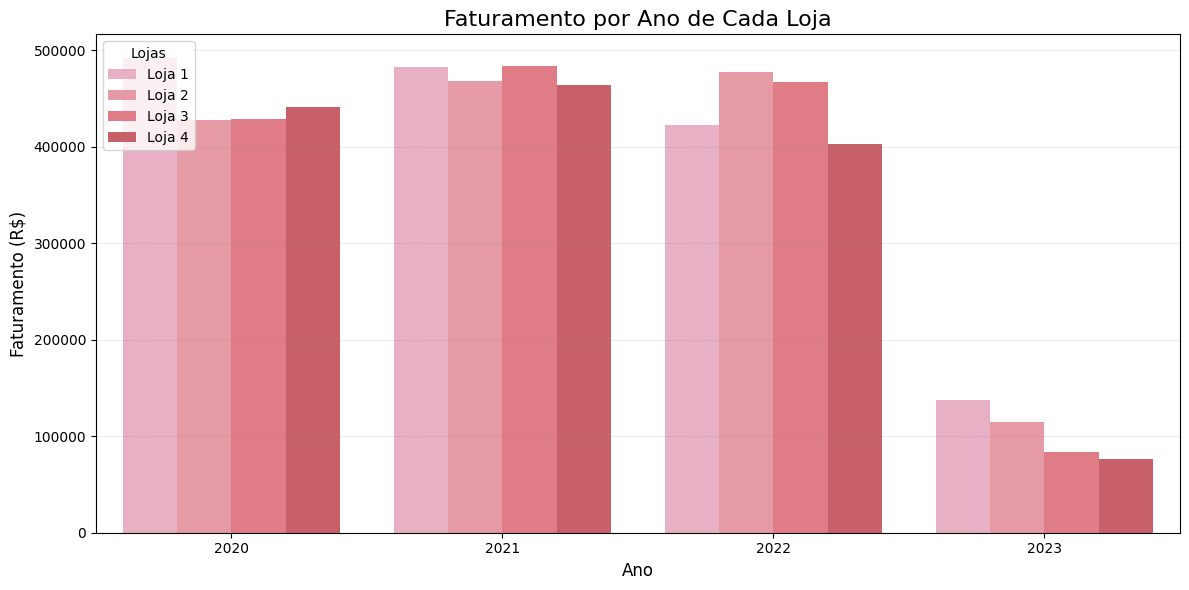

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Arredondar os valores de faturamento para facilitar a leitura
faturamento_ano_loja["Preço"] = faturamento_ano_loja["Preço"].round(2)

# Definir a paleta de cores Pantone: transição de rosa para roxo
cores_pantone = ["#F1A7C1", "#F28D9D", "#F06B79", "#D84F5A", "#C6343C", "#B11A1F"]

# Plotar gráfico de barras verticais
plt.figure(figsize=(12, 6))

# Criar gráfico de barras
sns.barplot(
    data=faturamento_ano_loja,
    x="Ano",
    y="Preço",
    hue="Loja Origem",
    palette=cores_pantone
)

# Detalhes visuais
plt.title("Faturamento por Ano de Cada Loja", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Lojas", loc="upper left")

# Adicionar linhas de referência (grid lines) em cinza claro
plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.3)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [5]:
# Verificar a última data de venda
ultima_venda = lojas["Data da Compra"].max()

print("Última venda realizada em:", ultima_venda.strftime("%d/%m/%Y"))

Última venda realizada em: 31/03/2023


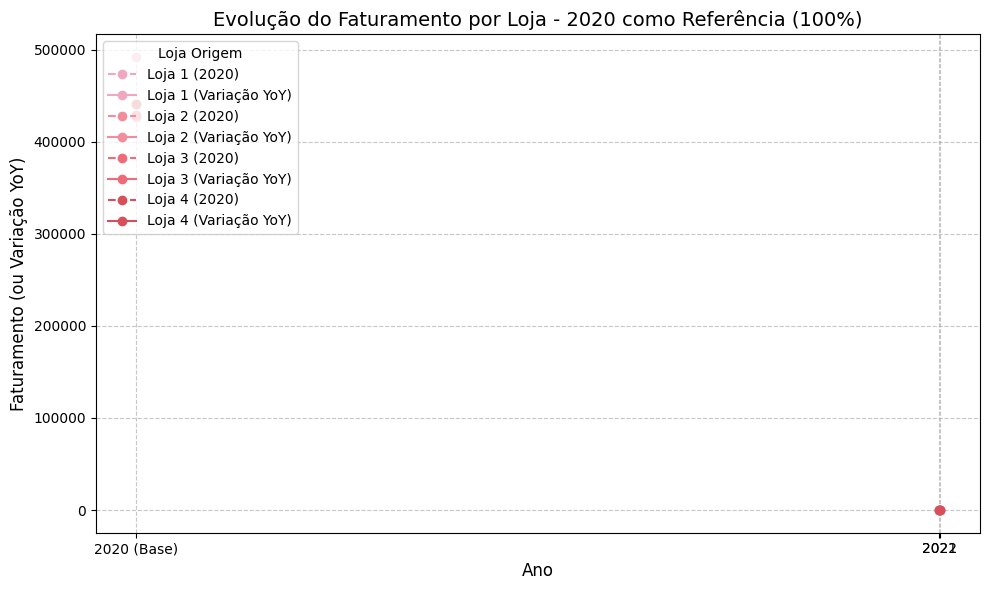

# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
